CODING ASSIGNMENT PREDICTION AND REGRESSION


In [1]:
# Import necessary libraries
import numpy as np  # Import NumPy for handling numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import warnings  # Import Warnings to suppress unnecessary warnings

# Suppress warning messages
warnings.filterwarnings("ignore")

# Import SHAP for interpreting model predictions
import shap

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import mean_squared_error for evaluating model performance
from sklearn.metrics import mean_squared_error

# Import train_test_split for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

from feature_engine.encoding import RareLabelEncoder

# Import CountVectorizer from sklearn.feature_extraction.text for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Import ast and re for working with text and regular expressions
import ast
import re

# Set Pandas options to display a maximum of 1000 rows
pd.set_option('display.max_rows', 1000)

In [3]:
import pandas as pd

# Importing CSV file
df = pd.read_csv('Flight_delay.csv', low_memory=False)

data_types = df.dtypes
print(data_types)

DayOfWeek             int64
Date                 object
DepTime               int64
ArrTime               int64
CRSArrTime            int64
UniqueCarrier        object
Airline              object
FlightNum             int64
TailNum              object
ActualElapsedTime     int64
CRSElapsedTime        int64
AirTime               int64
ArrDelay              int64
DepDelay              int64
Origin               object
Org_Airport          object
Dest                 object
Dest_Airport         object
Distance              int64
TaxiIn                int64
TaxiOut               int64
Cancelled             int64
CancellationCode     object
Diverted              int64
CarrierDelay          int64
WeatherDelay          int64
NASDelay              int64
SecurityDelay         int64
LateAircraftDelay     int64
dtype: object


In [4]:
print( df.head())

   DayOfWeek        Date  DepTime  ArrTime  CRSArrTime UniqueCarrier  \
0          4  03-01-2019     1829     1959        1925            WN   
1          4  03-01-2019     1937     2037        1940            WN   
2          4  03-01-2019     1644     1845        1725            WN   
3          4  03-01-2019     1452     1640        1625            WN   
4          4  03-01-2019     1323     1526        1510            WN   

                  Airline  FlightNum TailNum  ActualElapsedTime  ...  TaxiIn  \
0  Southwest Airlines Co.       3920  N464WN                 90  ...       3   
1  Southwest Airlines Co.        509  N763SW                240  ...       3   
2  Southwest Airlines Co.       1333  N334SW                121  ...       6   
3  Southwest Airlines Co.        675  N286WN                228  ...       7   
4  Southwest Airlines Co.          4  N674AA                123  ...       4   

   TaxiOut  Cancelled  CancellationCode Diverted CarrierDelay WeatherDelay  \
0       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
20106,Table 1a,2004,3,30781,30194,"Baton Rouge, LA","Dallas/Fort Worth, TX",10781,11298,BTR,...,129.22,AA,0.5100,127.10,AA,0.5100,127.10,"Baton Rouge, LA\n(30.443319, -91.187488)","Dallas/Fort Worth, TX\n(40.11086, -77.035636)",200431078111298BTRDFW
97806,Table 1a,1998,4,30194,30325,"Dallas/Fort Worth, TX","Denver, CO",11259,11292,DAL,...,216.25,CO,0.9300,226.18,CO,0.9300,226.18,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Denver, CO\n(39.738453, -104.984853)",199841125911292DALDEN
232130,Table1a,2022,2,33044,32467,"Louisville, KY","Miami, FL (Metropolitan Area)",14730,11697,SDF,...,173.64,NK,0.4442,110.02,NK,0.4442,110.02,NaN,NaN,202221473011697SDFFLL
115277,Table 1a,2007,1,31267,32575,"Dayton, OH","Los Angeles, CA (Metropolitan Area)",11267,12954,DAY,...,160.76,US,0.5000,156.93,US,0.5000,156.93,"Dayton, OH\n(39.760982, -84.192203)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",200711126712954DAYLGB
106484,Table 1a,2012,2,33728,30852,"Pensacola, FL","Washington, DC (Metropolitan Area)",14193,12264,PNS,...,307.46,UA,0.4700,330.00,FL,0.1700,249.26,"Pensacola, FL\n(30.406931, -87.217578)","Washington, DC (Metropolitan Area)\n(38.892062...",201221419312264PNSIAD


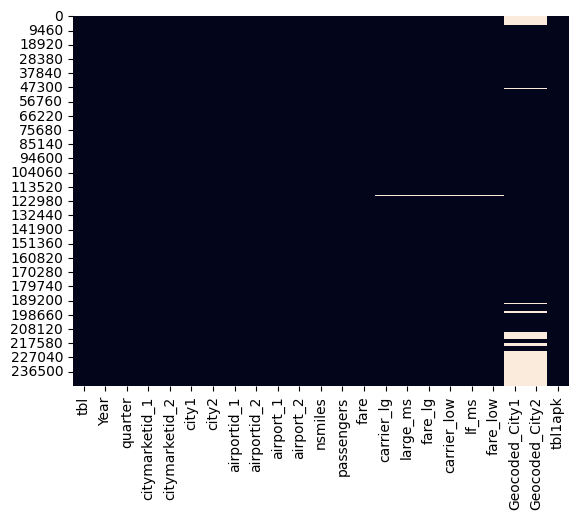

(205189, 23)
(245955, 15)


(9806, 23)


(0, 23)

Log transforming column nsmiles
Log transforming column passengers
Label encoding column tbl
Label encoding column Year
Label encoding column quarter
Label encoding column citymarketid_1
Label encoding column citymarketid_2
Label encoding column city1
Label encoding column city2
Label encoding column airportid_1
Label encoding column airportid_2
Label encoding column airport_1
Label encoding column airport_2
Label encoding column carrier_lg
Label encoding column large_ms
Label encoding column fare_lg
Label encoding column carrier_low
Label encoding column lf_ms
Label encoding column fare_low
Label encoding column Geocoded_City1
Label encoding column Geocoded_City2
Label encoding column tbl1apk
Label encoding column log10_nsmiles
Label encoding column log10_passengers
(245955, 23)
CPU times: total: 2.47 s
Wall time: 6.01 s


,89609,113055,147158,120850,113370,195051,165837,177054,16524,82452
tbl,Table 1a,Table 1a,Table 1a,Table 1a,Table 1a,Table 1a,Table 1a,Table 1a,Table 1a,Table 1a
Year,2000,2007,2009,2006,2009,2016,2002,2011,1999,1997
quarter,3,2,2,1,3,4,2,1,4,2
citymarketid_1,32575,30194,30977,31703,30721,31703,30721,30466,31703,33195
citymarketid_2,34653,33342,32575,30436,31703,30852,31703,30559,33851,30852
city1,"Los Angeles, CA (Metropolitan Area)","Dallas/Fort Worth, TX","Chicago, IL","New York City, NY (Metropolitan Area)","Boston, MA (Metropolitan Area)","New York City, NY (Metropolitan Area)","Boston, MA (Metropolitan Area)","Phoenix, AZ","New York City, NY (Metropolitan Area)","Tampa, FL (Metropolitan Area)"
city2,"Tulsa, OK","Milwaukee, WI","Los Angeles, CA (Metropolitan Area)","Tucson, AZ","New York City, NY (Metropolitan Area)","Washington, DC (Metropolitan Area)","New York City, NY (Metropolitan Area)","Seattle, WA","Oklahoma City, OK","Washington, DC (Metropolitan Area)"
airportid_1,10800,11298,13232,15070,13296,12478,10721,14107,15070,15304
airportid_2,15370,13342,12954,15376,12197,10821,12197,14747,13851,12264
airport_1,BUR,DFW,MDW,SWF,MHT,JFK,BOS,PHX,SWF,TPA


(122977, 22) (122978, 22) (122977,) (122978,)
